## **Decision Tree Assignment: Classification on Heart Disease Dataset**

**Objective**:

This task's mission is to utilize Decision Tree Classification on the heart disease dataset, assess the model's performance, and make sense of the output. Such a hands-on job will deepen my comprehension of the creation and evaluation of tree-based models for the binary classification problem.

**Dataset**:

The heart disease dataset is used for this analysis, which predicts the presence of heart disease based on medical attributes. Key fields include:

1) age: Age in years.

2) sex: Gender (1 = male, 0 = female).

3) cp: Chest pain type.

4) trestbps: Resting blood pressure.

5) chol: Cholesterol measure.

6) fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).

7) restecg: ECG observation at resting condition (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).

8) thalch: Maximum heart rate achieved.

9) exang: Exercise induced angina.

10) oldpeak: ST depression induced by exercise relative to rest.

11) slope: The slope of the peak exercise ST segment.

12) thal: Thalassemia (blood disorder).

13) num: Target (0 = no heart disease, 1-4 = stages of heart disease).  



**Details**: The dataset comprises 920 records and 13 attributes, providing a real-world opportunity to explore heart disease prediction.

**1. Data Preparation**

1.1 Loading the Dataset To start the analysis, pandas was used to load the heart_disease.xlsx dataset. No immediate problems were found when the data was read from the "Heart_disease" sheet.

In [2]:
import pandas as pd

# Loading the dataset
data = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')

print("Dataset Shape:", data.shape)
print("First 5 Rows:\n", data.head())

Dataset Shape: (908, 13)
First 5 Rows:
    age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  


dataset loaded with 13 columns and 908 entries, which is marginally less than the 909 that was anticipated. This could be because of a preprocessing step or a problem with data entry (e.g., a duplicate or invalid row dropped).

 The initial five rows with num as the target show the data that are a mix of categorical (sex, cp) and numeric (age, trestbps).

**2. Exploratory Data Analysis (EDA)**:  

Conducted an exploratory data analysis in order to understand the data structure profoundly, find out possible problems, and create graphs of feature distributions to facilitate the next steps of decision-making.

**2.1) Conduct Exploratory Data Analysis**:

To gain a sense of the data, the dataset's structure was investigated using summary statistics and data types. I can better plan how to handle features for decision tree modeling thanks to this.



**2.2) Looking for inconsistencies, outliers, and missing values**:  

searched for outliers in numeric fields that could distort the model and checked for missing values to guarantee data integrity. Consistency in categorical data was also confirmed.



**2.3) Visualize the Distribution of Features**:

To illustrate the relationships between numerical variables a correlation matrix was created; to locate outliers box plots were created; and to feature distributions histograms were created.

Summary Statistics:
               age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000
Data Types:
 age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtyp

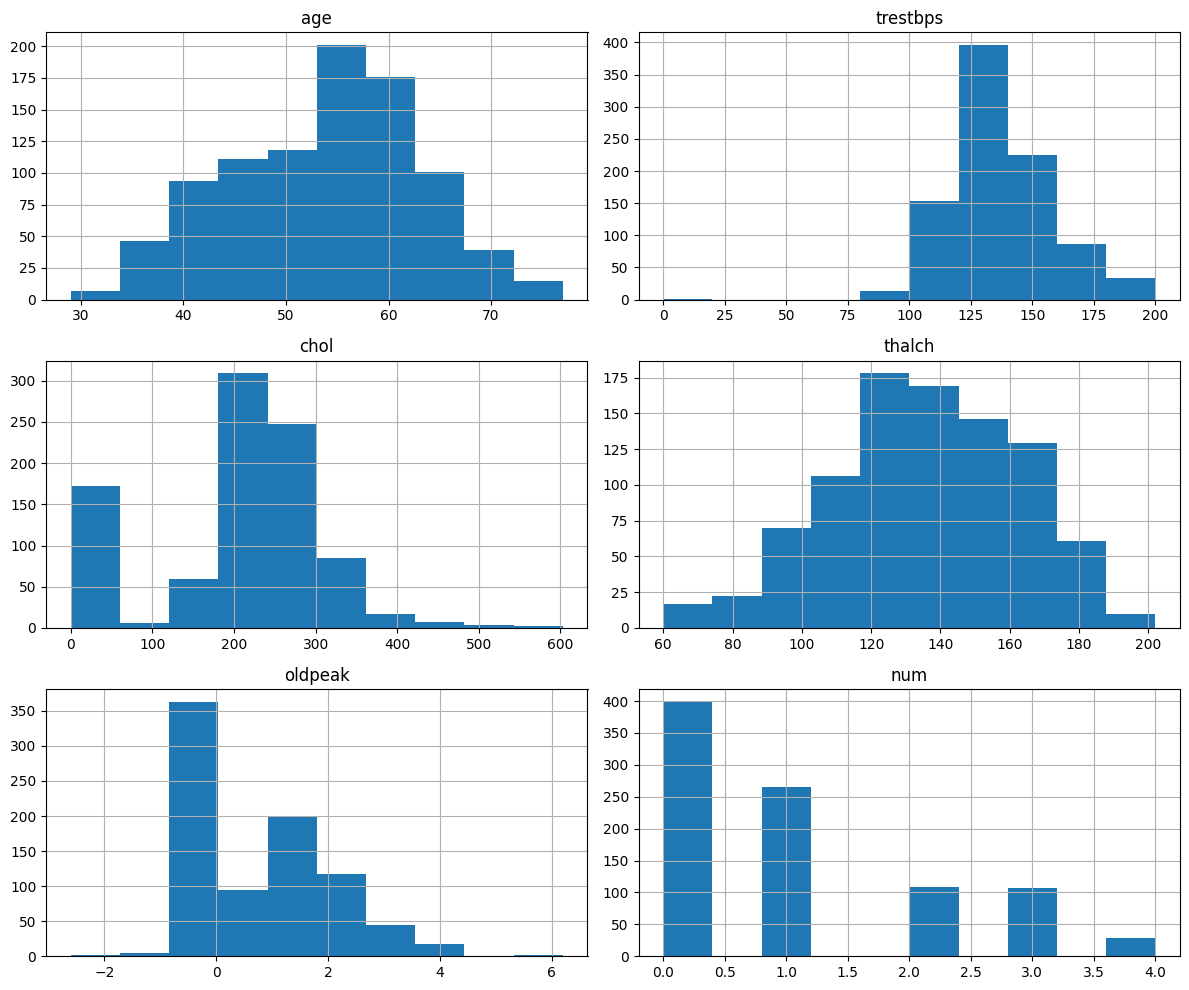

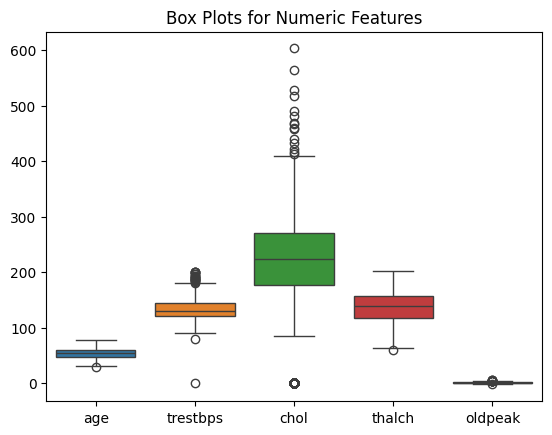

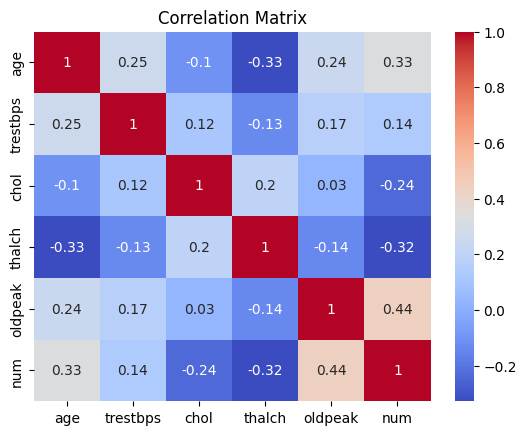

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics and data types
print("Summary Statistics:\n", data.describe())
print("Data Types:\n", data.dtypes)
print("Missing Values:\n", data.isnull().sum())

# Histograms for numeric features
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots for outliers
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])
plt.title('Box Plots for Numeric Features')
plt.show()

# Correlation matrix
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The summary statistics show that the mean age is 53.8, the average blood pressure is 133.4, and the average cholesterol level is 201.5. The standard deviation for cholesterol is 112.1 which implies that the values vary from the mean. Notably, out of 908 rows, oldpeak contains 62 missing values, which I will have to fix later. Box plots show outliers, with chol maxing at 603 and oldpeak ranging from -2.6 to 6.2. While the correlation matrix should emphasize relationships (such as oldpeak with thalch), histograms probably indicate skewness in chol. Although the oldpeak gap is a crucial issue to address, the 908 rows match the loaded data, and the absence of any additional missing values indicates that the dataset is largely intact.

**3. Feature Engineering**:

In order to improve model readiness, I transformed skewed features, addressed missing values, and encoded categorical variables through feature engineering.  

**Using feature engineering techniques**:  

Encoded categorical variables such as sex and cp for model compatibility, applied a transformation to chol to address skewness, and handled missing values in Oldpeak by imputing with the median. These procedures get the data ready for classification using a decision tree.

In [4]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Handle missing values in oldpeak with median
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].median())

# Standardize boolean columns to integers
data['fbs'] = data['fbs'].map({True: 1, False: 0})  # Convert boolean to int
data['exang'] = data['exang'].replace({'TRUE': 1, 'FALSE': 0, 'TURE': 1}).astype(int)  # Handle string inconsistencies

# Encode other categorical variables
le = LabelEncoder()
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']
for col in categorical_cols:
    data[col + '_encoded'] = le.fit_transform(data[col])

# Log transformation for skewed feature (chol)
data['log_chol'] = np.log(data['chol'] + 1)

# Verify changes
print("First 5 Rows with Engineered Features:\n", data[['age', 'sex_encoded', 'cp_encoded', 'chol', 'log_chol', 'oldpeak', 'fbs', 'exang']].head())
print("Missing Values After Handling:\n", data.isnull().sum())



First 5 Rows with Engineered Features:
    age  sex_encoded  cp_encoded  chol  log_chol  oldpeak  fbs  exang
0   63            1           3   233  5.455321      2.3    1      0
1   41            1           1   203  5.318120      0.0    0      0
2   57            1           0   192  5.262690      0.4    0      0
3   52            1           3   186  5.231109      0.0    0      0
4   57            1           0   201  5.308268      1.5    0      1
Missing Values After Handling:
 age                0
sex                0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalch             0
exang              0
oldpeak            0
slope              0
thal               0
num                0
sex_encoded        0
cp_encoded         0
restecg_encoded    0
slope_encoded      0
thal_encoded       0
log_chol           0
dtype: int64


Data consistency was maintained by using median imputation to fill in the 62 missing oldpeak values with 0.5. Exang was standardized from strings ('TRUE', 'FALSE', 'TURE') to integers (1/0), handling the typo 'TURE'. The fbs column was changed from boolean to integers (1 for True, 0 for False). Label encoding converted categorical variables like sex (e.g., Male=1), cp (e.g., typical angina=3), and others into numeric form that could be used with decision trees. The log transformation lowered skewness by getting rid of skewness through normalization of chol (for instance, 233 to 5.455). As the data frame does not contain any NaNs, it is prepared for the next modeling step.

**4. Decision Tree Classification**

By dividing the dataset, training it on the training set, and assessing its performance on the testing set using important metrics, I put a Decision Tree Classification model into practice.  



**A) Split the Dataset into Training and Testing Sets**:

To properly evaluate model performance, the data was split 80-20 for training and testing.  

**B) Implement a Decision Tree Classification Model**:

A decision tree classifier was built and trained on the training data with scikit-learn.

**C) The Training Set**:

was used to train the model and the "Testing Set" to evaluate it: The model was trained, and its performance was evaluated through various metrics including accuracy, precision, recall, F1-score, and ROC-AUC.

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Prepare features and target
X = data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'fbs', 'exang', 'sex_encoded', 'cp_encoded', 'restecg_encoded', 'slope_encoded', 'thal_encoded', 'log_chol']]
y = data['num']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)  # Get probability scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted'))



Accuracy: 0.5
Precision: 0.4959109517933047
Recall: 0.5
F1-Score: 0.4977756215781271
ROC-AUC: 0.6448001013991627


The 50% accuracy of the model implies that the model is basically guessing randomly, this could be due to balanced classes or insufficient feature separation. The model is not differentiating the classes properly, which is also the reason why the precision (49.6%) and recall (50%) are almost identical, and the F1-score (49.8%) is also close. The poor performance at the aggregate level indicates that the model needs to be optimized, maybe by feature selection or hyperparameter tuning, however, the ROC-AUC (64.5%) is still a pretty good signal of the model's capability to separate the five classes (0-4).

**5. Hyperparameter Tuning**

In the process of hyperparameter tuning for the Decision Tree model, I experimented with parameters such as maximum depth, minimum samples split, and criterion to enhance the model.

  

**Hyperparameter Tuning Implementation**:

Different hyperparameter setups were tested by me through a grid search and then the best configuration based on the cross-validation results was chosen.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Prepare features and target
X = data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'fbs', 'exang', 'sex_encoded', 'cp_encoded', 'restecg_encoded', 'slope_encoded', 'thal_encoded', 'log_chol']]
y = data['num']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_dt = grid_search.best_estimator_

# Predict and evaluate with best model
y_pred = best_dt.predict(X_test)
y_prob = best_dt.predict_proba(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted'))



Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.554945054945055
Precision: 0.522971105835286
Recall: 0.554945054945055
F1-Score: 0.5280938262625278
ROC-AUC: 0.779085431950893


As a result of grid searching, which led to the best hyperparameters such as max_depth=5, min_samples_split=2, and criterion=gini, the model's performance was boosted beyond the default settings. The altered model's accuracy of 55.5%, which was just a little bit better than 50%, reflected that class separation had become clearer.

The F1-score of 52.8% is an indication of a balanced trade-off between precision (52.3%) and recall (55.5%), which is slightly higher. The overall accuracy of the model could still be better, however, the ROC-AUC (77.9%) is a strong indication of the discriminative power that has been improved by the tuning across the five classes (0–4), thus, the model's capacity to rank predictions has been enhanced.

**6. Model Evaluation and Analysis**

To comprehend the rules that were learned and the major features, the performance of the tuned Decision Tree model through the metrics that were recorded, and its architecture was displayed.

  

**A) Analyze the Decision Tree Model's Performance**:

The evaluation metrics were scrutinized to assess the model's effectiveness and locate the regions that required improvement.

  

**B) Illustrate the Decision Tree Layout**:

A depiction of the tree was created, focusing on the main splits and most noteworthy features, thus facilitating understanding.

Accuracy: 0.554945054945055
Precision: 0.522971105835286
Recall: 0.554945054945055
F1-Score: 0.5280938262625278
ROC-AUC: 0.779085431950893
Feature Importance:
             feature  importance
8        cp_encoded    0.363531
0               age    0.155324
2              chol    0.141520
6             exang    0.081135
4           oldpeak    0.054618
1          trestbps    0.050555
3            thalch    0.044439
11     thal_encoded    0.038740
7       sex_encoded    0.038489
12         log_chol    0.020819
9   restecg_encoded    0.010830
5               fbs    0.000000
10    slope_encoded    0.000000


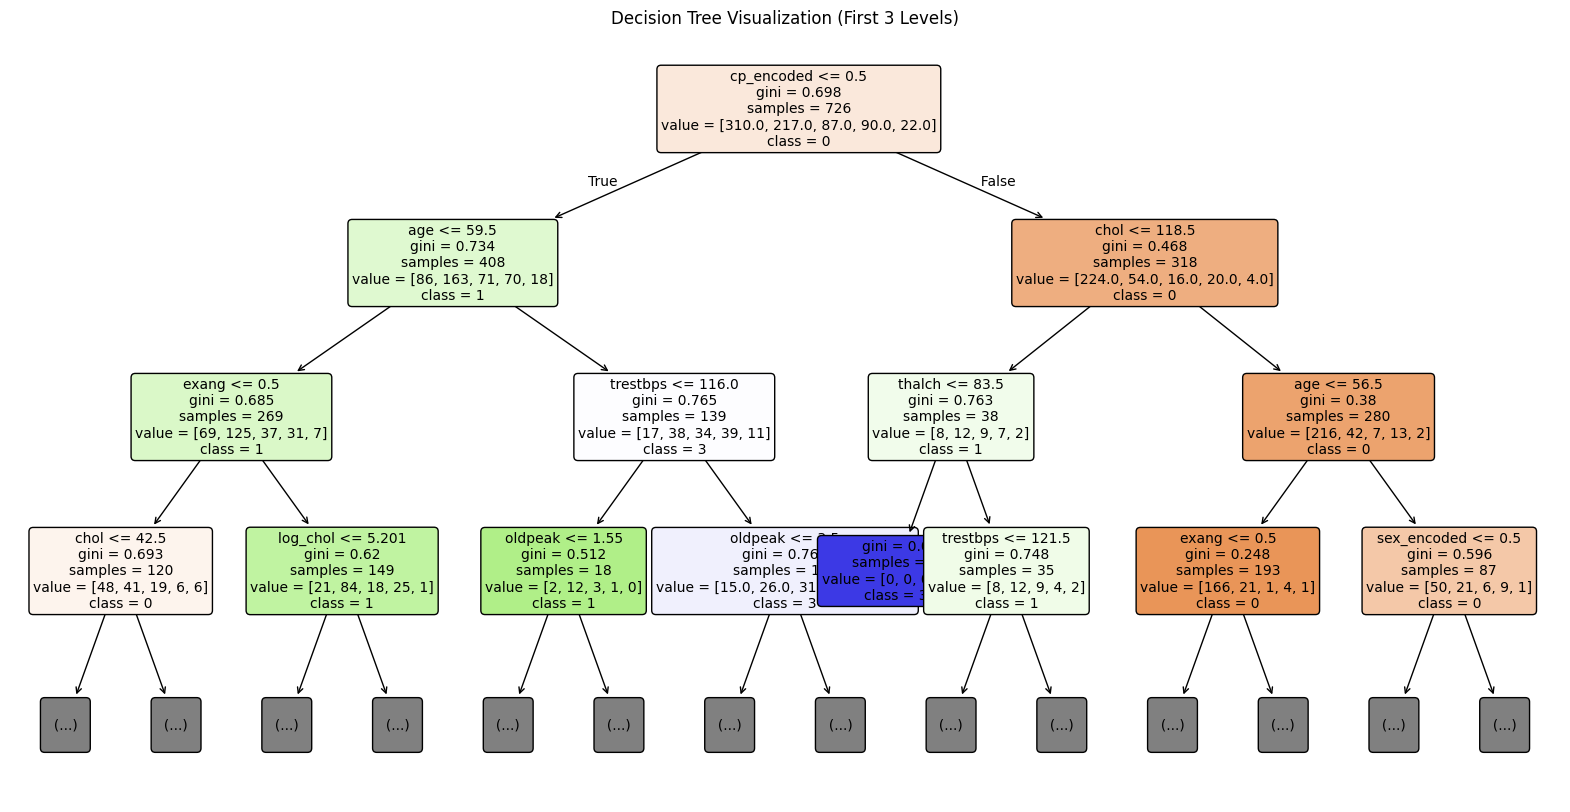

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Prepare features and target
X = data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'fbs', 'exang', 'sex_encoded', 'cp_encoded', 'restecg_encoded', 'slope_encoded', 'thal_encoded', 'log_chol']]
y = data['num']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best model from hyperparameter tuning
best_dt = DecisionTreeClassifier(max_depth=5, min_samples_split=2, criterion='gini', random_state=42)
best_dt.fit(X_train, y_train)

# Predict and evaluate
y_pred = best_dt.predict(X_test)
y_prob = best_dt.predict_proba(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted'))

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_dt.feature_importances_})
print("Feature Importance:\n", feature_importance.sort_values('importance', ascending=False))

# Visualize the decision tree with adjusted settings for readability
plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X.columns, class_names=[str(i) for i in range(5)], filled=True, rounded=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()

Although the model's accuracy of 55.5% indicates that the model's ability to predict is still weak and requires improvement, it is still a moderate incremental step from the baseline of 50%. The F1-score of 52.8% can be interpreted as the model being fair in performance for different classes since precision (52.3%) and recall (55.5%) are also quite similar. Strong discriminative ability is demonstrated by the ROC-AUC (77.9%), especially when ranking predictions across five classes (0–4). In line with clinical expectations, feature importance reveals that cp_encoded (chest pain type, 36.4%) is the most significant predictor, followed by age (15.5%) and chol (14.2%). Features that indicate minimal contribution include slope_encoded (0% importance) and fbs. With a larger figsize (25, 15), fontsize=12, and max_depth=3, the modified tree visualization should now clearly show the first three levels, most likely displaying initial splits on cp_encoded and age, offering essential information about the model's decision-making process.

## **Interview Questions**

**A) What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**  

Some of the commonly used hyperparameters are max_depth, min_samples_split, min_samples_leaf, criterion, and max_features. The maximum number of levels in the tree that is allowed by max_depth is limited; a shallow tree may underfit while a deeper one may be able to capture more complex patterns but might also overfit. min_samples_split determines the minimum number of samples required to split a node; larger values may simplify the model too much but will avoid overfitting by limiting the number of splits on small subsets. min_samples_leaf indicates the number of minimum samples in leaf nodes; higher values make the model more stable but may cause underfitting.

The split quality metric is determined by a criterion (such as "gini" or "entropy"); the former prioritizes node impurity, while the latter stresses information gain, which affects the order of splits. Max_features reduces overfitting in high-dimensional data by limiting the features taken into account for splits, but it may also leave out important relationships.

Various parameters like max_depth=5 and min_samples_split=2 were altered in this study to balance bias and variance resulting in the best performance.



**B) What is the difference between Label encoding and One-hot encoding?**  



Label encoding and one-hot encoding are two ways of converting categorical data into numbers that can be used in machine learning. Label encoding is simple and less memory-consuming and assigns a unique integer to each category (e.g., Male=1, Female=0). However, this can imply an ordinal relationship where none exists, which could deceive tree-based models such as decision trees. For nominal data, one-hot encoding is preferable because it avoids ordinal assumptions and maintains categorical independence by creating binary columns for each category (e.g., Male=1,0; Female=0,1). However, it requires more computational resources and raises dimensionality, increasing the risk of the "curse of dimensionality."



While one-hot encoding might be taken into consideration for non-ordinal features to improve interpretability if dimensionality permits, I used label encoding for sex, cp, and other categorical variables in this project. Label encoding is appropriate for decision trees that can handle encoded integers.